In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import os
import watershed_udder as wu
from PIL import Image
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from astropy.convolution import Gaussian2DKernel, convolve,interpolate_replace_nans
import pandas as pd

C:\Users\marie\AppData\Local\Temp\ipykernel_15088\3345164465.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
def mk_dir(dirpath):
    if not os.path.exists(dirpath):
        os.mkdir(dirpath)

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}

plt.rcParams.update(rc)

In [57]:
dirpath = os.getcwd()
label_dir = r"validate_watershed\watershed_segments"
corr_dir = r"validate_watershed\watershed_correspondence"
im_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), r"udder_video\depth_images")
out_dir = r"validate_watershed\watershed_examples"
file_list = os.listdir(label_dir)
color_dict = {'lf': 'cyan', 'rf': 'yellow', 'lb': 'orchid', 'rb': 'dodgerblue'}
file_list = ["1116_20231117_141845_frame_224.npy", "1335_20231117_121441_frame_329.npy","1295_20231117_130928_frame_334.npy", "1236_20231117_142505_frame_421.npy", "1236_20231117_142505_frame_421.npy", "922_20231117_141213_frame_529.npy","1291_20231117_112153_frame_279.npy"]

C:\Users\marie\AppData\Local\Temp\ipykernel_15088\727787086.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


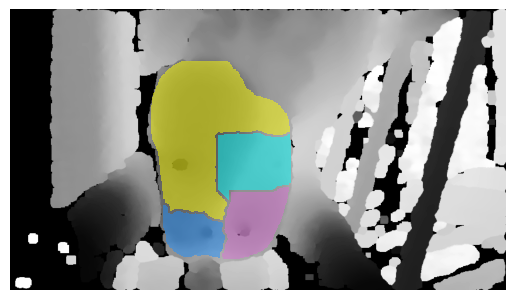

In [61]:
for file in ["1325_20231117_113835_frame_747.npy"]:
    label_file = os.path.join(label_dir, file)
    img_file = file.replace("npy", "tif")
    cow = file.split("_")[0]
    cor_df = pd.read_csv(os.path.join(corr_dir, file.replace("npy", "csv")))
    img = np.asarray(Image.open(os.path.join(im_dir, cow, img_file)), dtype = 'float').copy()
    labels = np.load(label_file)
    labels_mask =labels.copy().astype("float")
    img = np.asarray(img)
    img[img == 0] = np.nan
    kernel = Gaussian2DKernel(x_stddev=1)
    udder_conv = interpolate_replace_nans(img, kernel)
    udder_conv[np.isnan(udder_conv)] = 0
    img2 = exposure.equalize_hist(udder_conv, nbins=256, mask=None)
    labels_mask =labels.copy().astype("float")
    labels_mask[labels_mask==0] = np.nan
    
    # out_path = os.path.join(out_dir,cow)
    # mk_dir(out_path)
    # # fig.savefig(os.path.join(out_path, img_file), transparent = True)
    # # plt.close(fig
    
    # cmap = ListedColormap(["steelblue", "royalblue", 'skyblue', "cyan"])
    fig, ax = plt.subplots( frameon = False)
    ax.imshow(img2, cmap='gray')
    # ax.imshow(labels_mask, cmap = cmap, alpha=0.5)
    cdic = cor_df.to_dict(orient = "index")[0]
    for k, val in cdic.items():
       
        colorname = color_dict[k]
        mask_q = labels_mask.copy()
        mask_q[np.where(mask_q!= val)] = np.nan
        mask_q[np.where(mask_q== val)] = 1
        ax.imshow(mask_q, cmap = ListedColormap([colorname]) , alpha=0.5)
    fig.show()
    
    out_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), r"adsa\examples")
    out_path = os.path.join(out_dir, file+".png")
    fig.savefig(out_path, transparent = True)

In [52]:
cor_df

,lf,rf,lb,rb
0,3,1,3,2


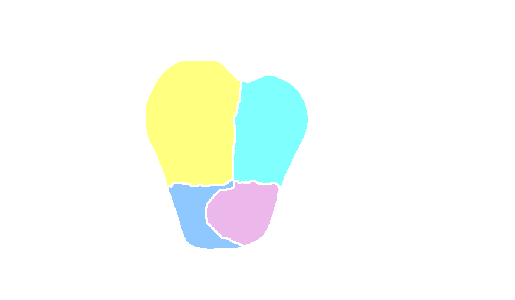

In [45]:
color_dict = {'lf': 'cyan', 'rf': 'yellow', 'lb': 'orchid', 'rb': 'dodgerblue'}
cdic = cor_df.to_dict(orient = "index")[0]
for k, val in cdic.items():
    colorname = color_dict[k]
    mask_q = labels_mask.copy()
    mask_q[np.where(mask_q!= val)] = np.nan
    mask_q[np.where(mask_q== val)] = 1
    plt.imshow(mask_q, cmap = ListedColormap([colorname]) , alpha=0.5)


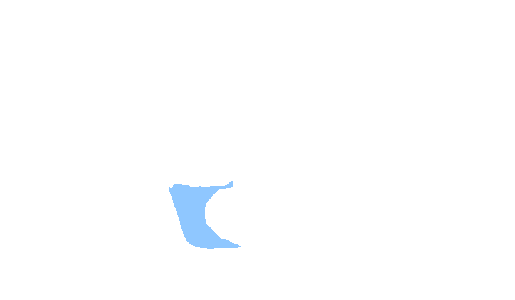

In [40]:
cdic.items()

dict_items([('lf', 1), ('rf', 2), ('lb', 3), ('rb', 4)])

C:\Users\marie\AppData\Local\Temp\ipykernel_10708\2472563830.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


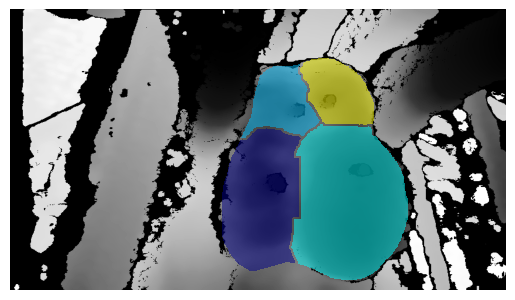

In [95]:
# from matplotlib.colors import LinearSegmentedColormap, ListedColormap
# cmap = ListedColormap(["yellow","deepskyblue" , "cyan", "darkblue"])
# fig, ax = plt.subplots( frameon = False)
# ax.imshow(img2, cmap='gray')
# ax.imshow(labels_mask, cmap = cmap, alpha=0.5)
# fig.show()

# out_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), r"adsa\examples")
# out_path = os.path.join(out_dir, "good_669_ws.png")
# fig.savefig(out_path, transparent = True)

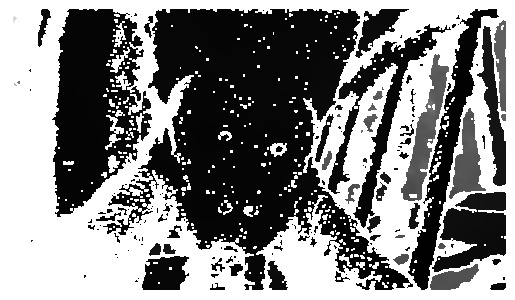

In [11]:
plt.imshow(img, cmap='gray')

In [12]:
kernel = Gaussian2DKernel(x_stddev=1)
udder_conv = interpolate_replace_nans(img, kernel)
udder_conv[np.isnan(udder_conv)] = 0

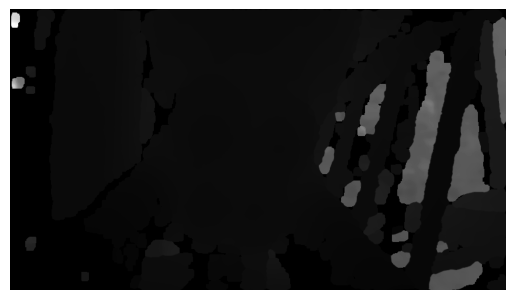

In [13]:
plt.imshow(udder_conv, cmap='gray')